## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

The purpose of this project is to assist an e-commerce business in understanding the results of an A/B test run  different versions of their landing page. The versions of the landing page consist of the old page and a newly dedveloped landing page.  The company's goal for their new page is to try and increase the number of users who "convert" to customers.  To "convert" means that the user has decided to pay for the company's product.  I will complete a full analysis of the A/B test and give my thoughts and recommendation on landing page in my conclusion.



<a id='probability'></a>
#### Part I - Probability

In [43]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [44]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [45]:
df.shape[0]

294478

In [46]:
#number of unique users in the dataset
df['user_id'].nunique()

290584

In [47]:
#The proportion of users converted
pro_converted_users = df.query('converted == 1').user_id.nunique()/ df.user_id.nunique()
pro_converted_users

0.12104245244060237

In [48]:
#The number of times the new_page and treatment don't match for treatment and new page
np_treat_notmatch = df.query('group == "treatment"& landing_page == "old_page"').shape[0]
np_treat_notmatch               

1965

In [49]:
#The number of times the new_page and treatment don't match for control and old page
num2 = df.query('group == "control" & landing_page == "new_page"').shape[0]
num2

#add values together to give total
answer = np_treat_notmatch + num2
answer

3893

In [50]:
#check for missing values
df.dropna()
df.shape[0]

294478

In [51]:
#get rid dof rows that have inaccurate data
df2 = df[((df['group'] == "treatment") & (df['landing_page'] == "new_page"))|
         ((df['group'] == "control") & (df['landing_page'] == "old_page"))]

df2.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [52]:
# Double check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [53]:
#How many unique user_ids are in df2?
df2.user_id.nunique()

290584

In [54]:
#How many total users, this shows a duplicate user_id
df2.shape[0]

290585

In [55]:
#identify duplicate user_id
duplicate = df2[df2.duplicated(subset=['user_id'])]
duplicate

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [56]:
#row information for user_id
dup = df2.query('user_id == "773192"')
dup

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [57]:
#remove duplicate row
df2 = df2.drop([2893, 0])

df2.shape[0]

290583

In [58]:
#the probability of an individual converting regardless of the page they receive
converted_users = df2.query("converted == 1").count()
converted_users

converted_users['converted']/ df2.shape[0]

0.11959749882133504

In [59]:
#control group probablity of conversion
control_prob = df2.query('group == "control"')['converted'].mean()
control_prob

0.12038713319061353

In [60]:
#treatment group probablity of conversion
treatment_prob = df2.query('group == "treatment"')['converted'].mean()
treatment_prob

0.11880806551510564

In [61]:
#probablity that an individual recieved a new page
num_new_page = df2.query('landing_page =="new_page"').shape[0]

new_page_prob = num_new_page/ df2.shape[0]
new_page_prob

0.5000636651146144

I do not think that there is sufficient evidence to conclude that the new treatment page leads to more conversions.  This is because each person in the study was given a 50/50 chance to receive the new page.  The overall probability that a person would convert to a customer was 12%.  The conversion rate was similar between the treatment and control groups.  Therefore, I do not think that there is a difference in conversion rates for people who recieve the old page verse the new page.


<a id='ab_test'></a>
### Part II - A/B Test

In [62]:
#conversion rate for Pnew under the null
p_null = df2['converted'].mean()
p_null

0.11959749882133504

In [63]:
#conversion rate for Pold under the null, must be same
p_null

0.11959749882133504

In [64]:
#number of individuals in the new page group
n_new = df2.query('group == "treatment"')['user_id'].count()
n_new

145310

In [65]:
#number of individuals in the old page group
n_old = df2.query('group == "control"')['user_id'].count()
n_old

145273

In [66]:
#conversion rate of Pnew under the null
new_page_converted = np.random.binomial(1, p_null, n_new)
new_page_converted.mean()

0.11933108526598307

In [67]:
#conversion rate of Pold under the null
old_page_converted = np.random.binomial(1,p_null, n_old)
old_page_converted.mean()

0.11987774741349046

In [68]:
#difference in conversion rate for Pnew and Pold under the null
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-0.00054666214750738462

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [69]:
#bootstrap sample of to get difference of conversion rates from 10,000 tests
p_diffs = []
new_converted = np.random.binomial(n_new, p_null, 10000)/n_new
old_converted = np.random.binomial(n_old, p_null, 10000)/n_old
p_diffs = new_converted - old_converted

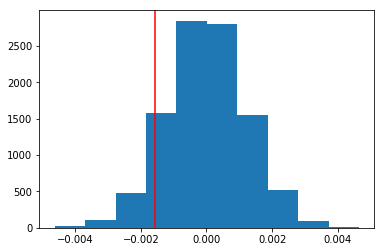

In [70]:
#histogram of differences from 10,000 tests
#calculate observed difference and show its placement on histogram
observed_diff = treatment_prob - control_prob
plt.hist(p_diffs);
plt.axvline(x = observed_diff, color='red');

In [71]:
#calculate the p-value for the observed difference
p_diffs_high = (p_diffs > observed_diff).mean() 
p_diffs_high

0.91020000000000001

I have calculated the p-value above.  The p-value is the probability of obtaining the observed difference if we assume that our null hypothesis is true.  The null hypothesis for this project is that there is not a difference in customer conversion rates based on the type of page that the user received. The closer to 1 that the p-value is, the less likely we are to reject our null hypothesis. I was looking for a value that was less than a 5% chance of a Type 1 error.  This would suggest that there is a significant difference in conversion rates when compared to landing page types and I would reject my null hypothesis. The value that I calculated for a p-value is .90 or 90%.  This is much higher than the 5% threshold. This tells me that 90% of the p_diff values were above my observed difference. The upper limit critical value of 5% would have suggested that less than 5% of the p_diff values were greater than the observed difference and this would suggest a significant difference to the positive (ie. customer conversion increase was significant).  This one-tailed test shows that my observed value is below the the upper limit critical value of 5% and this suggests that there is not enough evidence to reject the null hypothesis.

In [72]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

In [73]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
stat, pval = proportions_ztest(count, nobs)
print('Stat:', stat, 'Pval:', pval)

Stat: 1.31160832119 Pval: 0.18965232395


The z-score tells me how many standard deviations my observed difference was above the normal distribution mean. When using a 95% confidence level, the critical value that I am looking for in z-score is -1.96 and 1.96. The z-score that was calculated was 1.31.  This value is less than my critical value and therefore I do not have enough evidence to reject my null hypothesis.  The p-value is the probability value of obtaining results that were as or more extreme than the result that was observed.  The p-value threshold for a 95% Confidence Interval is p < .05 or 5%.  The p-value that I calculated based on my results was .19 or 19%.  This is well above the 5% threshold and therefore I do not have evidence to reject my null hypothesis.  Although the numbers are different, both the z-score and p-value calculated here agree with my interpretation of the p-value calculated from calculating the mean of the diffences greater than the observed diffence.


<a id='regression'></a>
### Part III - A Regression Approach


I will use logistic regression since my dependent variable row (converted) is either a 1 or 0. 

In [74]:
#using statsmodels to fit a regression model
df2['intercept'] = 1
df2[['d_page', 'ab_page']]= pd.get_dummies(df2['group'])
df2.drop('d_page', axis = 1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [75]:
#model created to predict if an individual will convert based on landing page
logmod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logmod.fit()


Optimization terminated successfully.
         Current function value: 0.366119
         Iterations 6


In [76]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-06 14:55 AIC:              212780.0937
No. Observations:   290583           BIC:              212801.2529
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6679  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

The model created above is showing a p-value for the new page of .1897.  This is well above the threshold of .05 or 5%.  This suggests that there is not a significant relationship between the landing page type and conversion rate. 

The p-value associated with the ab_page in my regression model is .1897.  The value is different than the value found in **Part II** of this project because **Part II** is evaluating if $P_{new}$ - $P_{old}$ > 0.  This is a one-tail evaluation that is looking for values that are signifivantly greater than our mean.  The null hypothesis for logistic regression is that there is no relationship between the two variables being observed (landing page vs. conversion rate).  The alternative hypothesis would be that there is a relationship, either positive or negetive, between the two variables.  This would suggest a two-tail evaluation, which is what we see in the model in **Part III**.  The two tail test will evaluate if the observed difference is significantly higher or lower than the mean of our normal distribution. In order to calculate the p-value for the high and low ends, I must divide the p-value from **Part III** by 2.  This will give me .0935. Each tail of the test would contain 9.35% of the values from our normal distribution.  The first test included all values above the observed value, including the high end tail.  We can calculate this by adding the p-value from **Part II** and **Part III**, .905 + .093 = .998 (rounded it will equal 1).

It would be a good idea to add other factors to my regression model in order to make sure that I am not missing an important relationship between conversion and another factor other than the landing page.  For example, another factor that could influence conversion rate could be if the person is a past customer, where they live, demographic, etc. Some of these factors may make the product or service that the company is selling more or less relavant to the customer. <br>
A disadvantage to adding additional factors to the regression model is the issue of multicollinearity.  This is when two independent variables are intercorrelated.  This makes it hard to predict the dependent variable using only one factor or to know which variable is the best predictor of the dependent variable outcome.

To the point of my above paragraph, I am going to add the factor of country to my model.  I am looking to see if where a person lives is a significant factor in predicting whether or not they will become a customer (convert).

In [77]:
#read in the country dataset and join to my current dataset
country = pd.read_csv('countries.csv')
df2 = df2.set_index('user_id').join(country.set_index('user_id'))
df2['country'].unique() #looking for what unique values are in country column

array(['US', 'CA', 'UK'], dtype=object)

In [78]:
df2[['CA','UK', 'US']]= pd.get_dummies(df2['country'])

In [79]:
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1
936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1


In [80]:
#adding factors of old page, new page, and country to my model 
logmod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK']])
results = logmod.fit()


Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


In [81]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-06 14:55 AIC:              212780.8689
No. Observations:   290583           BIC:              212823.1875
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7615  0.0000  -2.0067  -1.9718
ab_page      -0.0150    0.0114    -1.3076  0.1910  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5163  0.1294  -0.0935   0.0119
UK            0.0099    0.0133     0.7429  0.4575  -0.0162   0.0359
==================================================================

"""

The p-values associated with each country are above our .05 threshold and therefore do not suggest that country had a significant effect on conversion rates.

Previously, I had mentioned that looking a multiple factors could present the problem of multicollinearity. Multicollinearity is when two or more of our predictor variables (independent) have an effect on each other.  I am going to look at the interaction between page and country to see if there significant effects on conversion.  

In [82]:
#create variable representing interaction between page and country
df2['Cali_page'] = df2['CA']*df2['ab_page']
df2['UK_page'] = df2['UK']*df2['ab_page']

In [83]:
#add new variable to the model 
logmod = sm.Logit(df2['converted'], df2[['intercept', 'Cali_page', 'UK_page', 'CA', 'UK']])
results = logmod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-06 14:55 AIC:              212782.6712
No. Observations:   290583           BIC:              212835.5694
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3136  0.0000  -2.0101  -1.9833
Cali_page    -0.0674    0.0520    -1.2967  0.1947  -0.1694   0.0345
UK_page       0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
CA           -0.0073    0.0371    -0.1965  0.8442  -0.0799   0.0654
UK            0.0045    0.0175     0.2569  0.7973  -0.0298   0.0388
==================================================================

"""

In the previous test, we saw that landing page and country alone did not significantly effect our conversion rates. In order to take the model a step further, I decided to consider how one factor may affect another (multicollinearity).  To do this, I combined the factors of location and new page, in addition to considering the all factors from the previous test individually.  The results from the model show that none of the factors (country and new page, country, or new page) have a significant effect on the conversion rates, as all of the p-values are above the threshold of .05 or 5%. I come to the same conclusion as in the previous test, that there is no significant effect in conversion rates when considering the above factors. As a result of this conclusion, this model has allowed me to rule out the problem of multicollinearity between country and landing page. 

**Conclusion** <br>
According to the results from my models, the new landing page does not have a significant affect on customer conversion rates.  I would suggest that the company not invest money in a new page as the models created here do not suggest there would be a significant ROI from the new landing page. 

In [84]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0